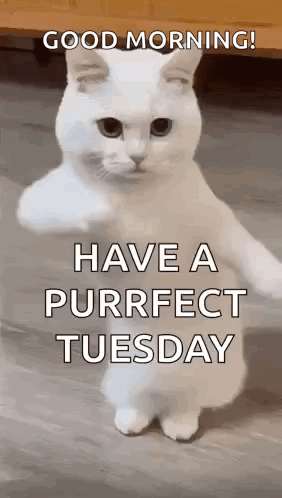

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('./Datset/Customer-Churn-Records.csv')

print(raw_data.shape)
df = raw_data.copy()
raw_data.head()

(10000, 18)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

<Axes: >

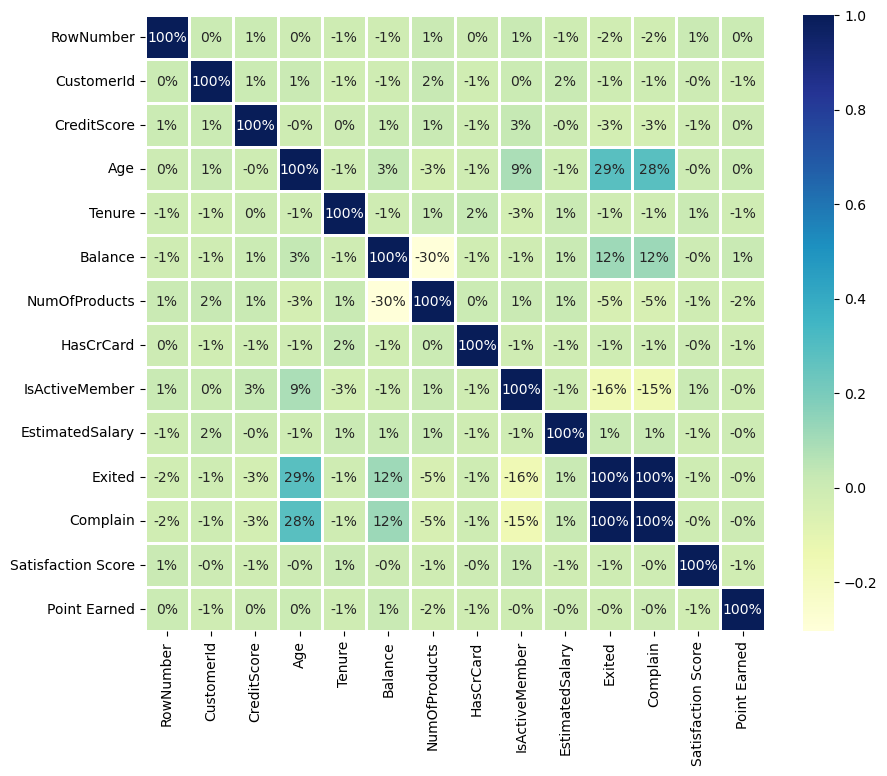

In [13]:
plt.figure(figsize=[10, 8])
sns.heatmap(data=df.corr(numeric_only=True) ,annot=True,fmt='.0%',lw=2,cmap='YlGnBu')

In [14]:
customer_id = df['CustomerId']
drop_feature = ['Surname','RowNumber']
df = df.drop(drop_feature, axis=1)

print(customer_id)

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64


In [16]:
df.head()

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Complain  Satisfaction Score Card Type  Point Earned  
0         1                   2   DIAMOND           464  
1         1                   3   DIAMOND           456  
2         1                   3   DIAMOND           377  
3         0                   5      GOLD           350  
4         0                   5      GOLD           425

# Customer Risk Score

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
corr = df.corr(numeric_only=True)['Exited']

In [25]:
col_features_minmax = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[col_features_minmax] = scaler.fit_transform(df[col_features_minmax])

df_scaled.head()

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
0    15634602        0.538    France  Female  0.324324     0.2  0.000000   
1    15647311        0.516     Spain  Female  0.310811     0.1  0.334031   
2    15619304        0.304    France  Female  0.324324     0.8  0.636357   
3    15701354        0.698    France  Female  0.283784     0.1  0.000000   
4    15737888        1.000     Spain  Female  0.337838     0.2  0.500246   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0       0.000000        1.0             1.0         0.506735     1.0   
1       0.000000        0.0             1.0         0.562709     0.0   
2       0.666667        1.0             0.0         0.569654     1.0   
3       0.333333        0.0             0.0         0.469120     0.0   
4       0.000000        1.0             1.0         0.395400     0.0   

   Complain  Satisfaction Score Card Type  Point Earned  
0       1.0                0.25   DIAMOND      0.391600  
1       1.0                0.50   DIAMOND      0.382520  
2       1.0                0.50   DIAMOND      0.292849  
3       0.0                1.00      GOLD      0.262202  
4       0.0                1.00      GOLD      0.347333

In [29]:
risk_score = ((df_scaled['Age']*0.3) 
              + (df_scaled['Balance']*0.1) 
              + (df_scaled['IsActiveMember']*0.4) 
              + (df_scaled['NumOfProducts']*0.2))*100
risk_score

0       49.729730
1       52.664639
2       29.426635
3       15.180180
4       55.137597
          ...    
9995    15.180180
9996    49.178462
9997    47.297297
9998    19.388660
9999     9.241132
Length: 10000, dtype: float64

In [31]:
df_scaled['Risk_Score'] = risk_score
df_scaled.head()

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
0    15634602        0.538    France  Female  0.324324     0.2  0.000000   
1    15647311        0.516     Spain  Female  0.310811     0.1  0.334031   
2    15619304        0.304    France  Female  0.324324     0.8  0.636357   
3    15701354        0.698    France  Female  0.283784     0.1  0.000000   
4    15737888        1.000     Spain  Female  0.337838     0.2  0.500246   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0       0.000000        1.0             1.0         0.506735     1.0   
1       0.000000        0.0             1.0         0.562709     0.0   
2       0.666667        1.0             0.0         0.569654     1.0   
3       0.333333        0.0             0.0         0.469120     0.0   
4       0.000000        1.0             1.0         0.395400     0.0   

   Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  
0       1.0                0.25   DIAMOND      0.391600   49.729730  
1       1.0                0.50   DIAMOND      0.382520   52.664639  
2       1.0                0.50   DIAMOND      0.292849   29.426635  
3       0.0                1.00      GOLD      0.262202   15.180180  
4       0.0                1.00      GOLD      0.347333   55.137597

### ดูคนที่ไม่ Churn Top10 และมี Risk Score มากว่าเท่ากับ 70

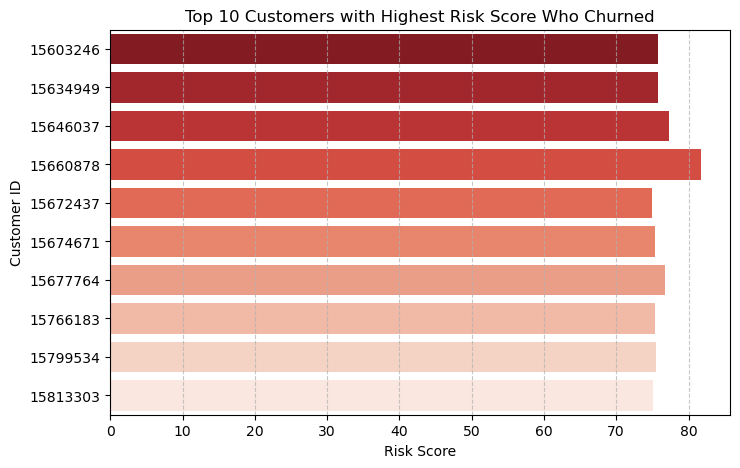

In [34]:
df_risk_score_all_geography = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Risk_Score'] >= 70)].sort_values(by='Risk_Score', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_risk_score_all_geography, x='Risk_Score', y='CustomerId', palette='Reds_r', orient='h')

plt.xlabel('Risk Score')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with Highest Risk Score Who Churned')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [36]:
df_risk_score_all_geography[['CustomerId','Geography','Risk_Score','NumOfProducts','IsActiveMember','Age']]

CustomerId Geography  Risk_Score  NumOfProducts  IsActiveMember  \
6759    15660878    France   81.691665       0.333333             1.0   
1614    15646037    France   77.252252       0.666667             1.0   
9292    15677764   Germany   76.800487       0.333333             1.0   
2108    15634949   Germany   75.803630       0.333333             1.0   
2901    15603246    France   75.749257       0.333333             1.0   
8469    15799534    France   75.452347       0.333333             1.0   
7063    15766183   Germany   75.374912       0.333333             1.0   
7788    15674671     Spain   75.298223       0.333333             1.0   
2458    15813303     Spain   75.045045       0.333333             1.0   
5377    15672437    France   74.957212       0.333333             1.0   

           Age  
6759  1.000000  
1614  0.797297  
9292  0.756757  
2108  0.756757  
2901  0.743243  
8469  0.716216  
7063  0.783784  
7788  0.783784  
2458  0.945946  
5377  0.729730

### ดูคนที่ไม่ Churn Top10 และมี Risk Score มากว่าเท่ากับ 70 แยกในแต่ละประเทศ

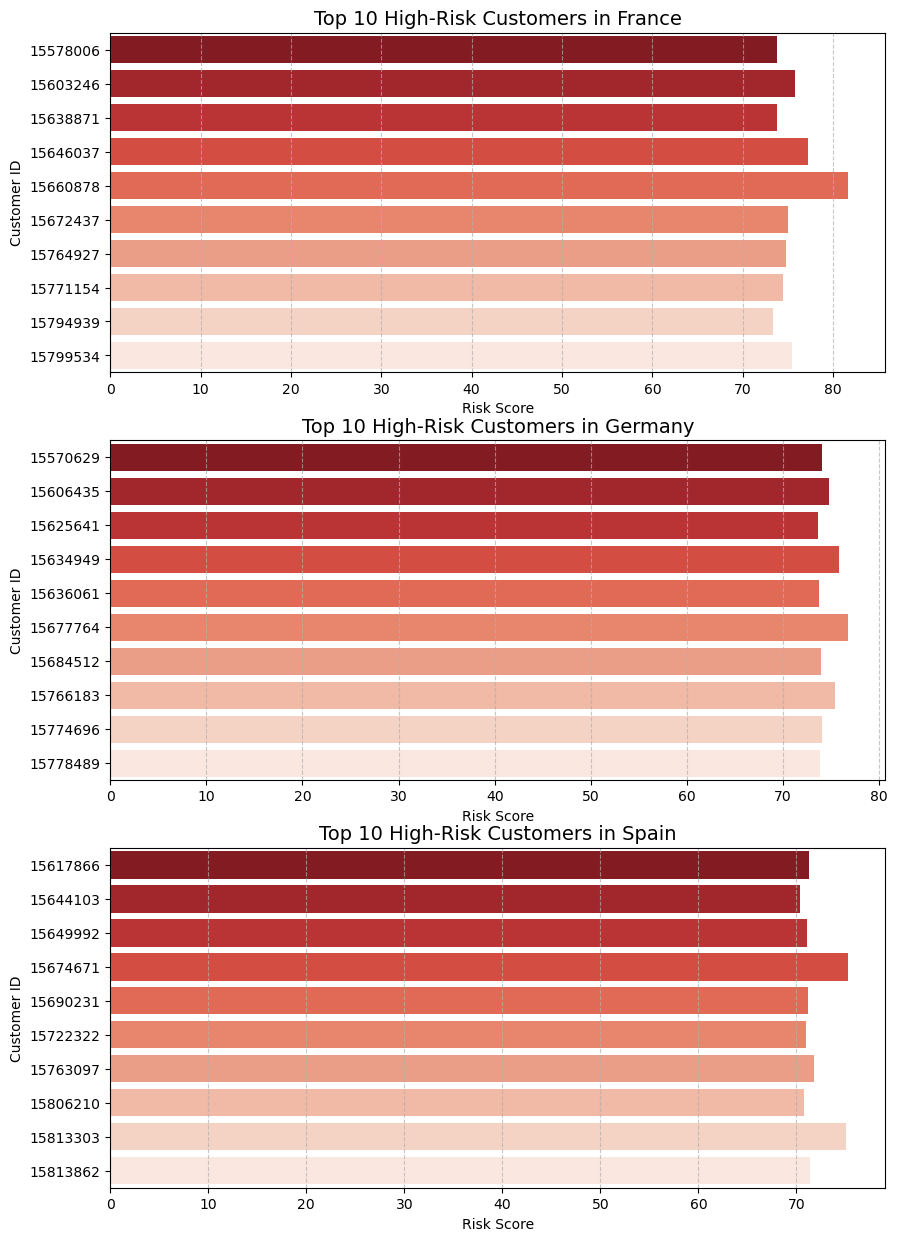

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

In [39]:
df_high_risk_split = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Risk_Score'] >= 70)]

df_top10_per_country = df_high_risk_split.groupby('Geography').apply(lambda x: x.nlargest(10, 'Risk_Score')).reset_index(drop=True)

countries = df_top10_per_country['Geography'].unique()
fig, axes = plt.subplots(nrows=len(countries), figsize=(10, 5 * len(countries)))

# กราฟแยกตามประเทศ
for ax, country in zip(axes, countries):
    plt.figure(figsize=(7,6))
    df_country = df_top10_per_country[df_top10_per_country['Geography'] == country]
    sns.barplot(data=df_country, x='Risk_Score', y='CustomerId', palette='Reds_r', orient='h', ax=ax)
    ax.set_title(f"Top 10 High-Risk Customers in {country}", fontsize=14)
    ax.set_xlabel("Risk Score")
    ax.set_ylabel("Customer ID")
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [41]:
df_top10_per_country[['CustomerId','Geography','Risk_Score','NumOfProducts','IsActiveMember','Age']]

CustomerId Geography  Risk_Score  NumOfProducts  IsActiveMember       Age
0     15660878    France   81.691665       0.333333             1.0  1.000000
1     15646037    France   77.252252       0.666667             1.0  0.797297
2     15603246    France   75.749257       0.333333             1.0  0.743243
3     15799534    France   75.452347       0.333333             1.0  0.716216
4     15672437    France   74.957212       0.333333             1.0  0.729730
5     15764927    France   74.843134       0.000000             1.0  1.000000
6     15771154    France   74.453533       0.333333             1.0  0.743243
7     15578006    France   73.828829       0.333333             1.0  0.905405
8     15638871    France   73.811039       0.333333             1.0  0.797297
9     15794939    France   73.389839       0.333333             1.0  0.729730
10    15677764   Germany   76.800487       0.333333             1.0  0.756757
11    15634949   Germany   75.803630       0.333333             1.0  0.756757
12    15766183   Germany   75.374912       0.333333             1.0  0.783784
13    15606435   Germany   74.796091       0.333333             1.0  0.689189
14    15570629   Germany   74.062386       0.333333             1.0  0.729730
15    15774696   Germany   74.011870       0.333333             1.0  0.770270
16    15684512   Germany   73.950804       0.333333             1.0  0.729730
17    15778489   Germany   73.834753       0.333333             1.0  0.716216
18    15636061   Germany   73.715040       0.333333             1.0  0.810811
19    15625641   Germany   73.676750       0.333333             1.0  0.756757
20    15674671     Spain   75.298223       0.333333             1.0  0.783784
21    15813303     Spain   75.045045       0.333333             1.0  0.945946
22    15763097     Spain   71.801802       0.333333             1.0  0.837838
23    15813862     Spain   71.389004       0.333333             1.0  0.648649
24    15617866     Spain   71.305799       0.333333             1.0  0.662162
25    15690231     Spain   71.161654       0.333333             1.0  0.594595
26    15649992     Spain   71.090020       0.333333             1.0  0.635135
27    15722322     Spain   70.990991       0.333333             1.0  0.810811
28    15806210     Spain   70.735746       0.333333             1.0  0.648649
29    15644103     Spain   70.369633       0.000000             1.0  0.810811

# Customer Loyalty Index

In [44]:
loyalty_score = ((df_scaled['Tenure']*0.2) 
                 + (df_scaled['IsActiveMember']*0.5) 
                 + (df_scaled['NumOfProducts']*0.3))*100
loyalty_score

0       54.0
1       52.0
2       36.0
3       12.0
4       54.0
        ... 
9995    20.0
9996    70.0
9997    64.0
9998    16.0
9999     8.0
Length: 10000, dtype: float64

In [46]:
df_scaled['Loyalty Score'] = loyalty_score
df_scaled.head()

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
0    15634602        0.538    France  Female  0.324324     0.2  0.000000   
1    15647311        0.516     Spain  Female  0.310811     0.1  0.334031   
2    15619304        0.304    France  Female  0.324324     0.8  0.636357   
3    15701354        0.698    France  Female  0.283784     0.1  0.000000   
4    15737888        1.000     Spain  Female  0.337838     0.2  0.500246   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0       0.000000        1.0             1.0         0.506735     1.0   
1       0.000000        0.0             1.0         0.562709     0.0   
2       0.666667        1.0             0.0         0.569654     1.0   
3       0.333333        0.0             0.0         0.469120     0.0   
4       0.000000        1.0             1.0         0.395400     0.0   

   Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  \
0       1.0                0.25   DIAMOND      0.391600   49.729730   
1       1.0                0.50   DIAMOND      0.382520   52.664639   
2       1.0                0.50   DIAMOND      0.292849   29.426635   
3       0.0                1.00      GOLD      0.262202   15.180180   
4       0.0                1.00      GOLD      0.347333   55.137597   

   Loyalty Score  
0           54.0  
1           52.0  
2           36.0  
3           12.0  
4           54.0

In [48]:
df_scaled['Loyalty Score'].describe()

count    10000.000000
mean        41.082600
std         26.216077
min          0.000000
25%         16.000000
50%         52.000000
75%         66.000000
max        100.000000
Name: Loyalty Score, dtype: float64

### Loyalty Score มากกว่า 80 

In [51]:
df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Loyalty Score'] >= 80)].sort_values(by='Loyalty Score', ascending=False)

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
1614    15646037        0.582    France    Male  0.797297     0.9  0.000000   
3062    15697574        0.464    France  Female  0.297297     0.9  0.000000   
9018    15680611        0.626    France    Male  0.662162     0.9  0.000000   
8346    15793324        0.690     Spain    Male  0.189189     0.9  0.000000   
934     15790299        0.484     Spain    Male  0.256757     0.9  0.000000   
...          ...          ...       ...     ...       ...     ...       ...   
3419    15684103        0.648    France  Female  0.108108     1.0  0.000000   
3356    15713621        0.674   Germany    Male  0.310811     1.0  0.535350   
3308    15733014        0.926    France  Female  0.594595     1.0  0.257746   
3228    15693264        0.466    France  Female  0.148649     1.0  0.000000   
9945    15674000        0.590    France    Male  0.351351     1.0  0.000000   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
1614       0.666667        1.0             1.0         0.407551     0.0   
3062       0.666667        1.0             1.0         0.304743     0.0   
9018       0.666667        1.0             1.0         0.361570     0.0   
8346       0.666667        0.0             1.0         0.192629     0.0   
934        0.666667        1.0             1.0         0.053232     0.0   
...             ...        ...             ...              ...     ...   
3419       0.333333        1.0             1.0         0.692124     0.0   
3356       0.333333        1.0             1.0         0.990359     0.0   
3308       0.333333        0.0             1.0         0.702280     0.0   
3228       0.333333        1.0             1.0         0.556424     0.0   
9945       0.333333        0.0             1.0         0.833558     0.0   

      Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  \
1614       0.0                0.75  PLATINUM      0.825199   77.252252   
3062       0.0                0.25    SILVER      0.597049   62.252252   
9018       0.0                0.50  PLATINUM      0.712826   73.198198   
8346       0.0                0.75      GOLD      0.404086   59.009009   
934        0.0                0.00   DIAMOND      0.333712   61.036036   
...        ...                 ...       ...           ...         ...   
3419       0.0                0.00  PLATINUM      0.618615   49.909910   
3356       0.0                0.75   DIAMOND      0.321226   61.344488   
3308       0.0                0.75    SILVER      0.649262   67.081963   
3228       0.0                0.75    SILVER      0.516459   51.126126   
9945       0.0                0.75  PLATINUM      0.988649   57.207207   

      Loyalty Score  
1614           88.0  
3062           88.0  
9018           88.0  
8346           88.0  
934            88.0  
...             ...  
3419           80.0  
3356           80.0  
3308           80.0  
3228           80.0  
9945           80.0  

[127 rows x 18 columns]

#### มีคนออก แต่ Loyalty Score 100% hahaha

In [54]:
df_scaled[(df_scaled['Exited'] == 1) & (df_scaled['Loyalty Score'] >= 100)].sort_values(by='Loyalty Score', ascending=False)

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
4606    15784958        0.894    France  Female  0.500000     1.0  0.000000   
8590    15633194        0.842    France  Female  0.310811     1.0  0.431685   
9215    15624180        0.468   Germany  Female  0.256757     1.0  0.534766   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
4606            1.0        1.0             1.0         0.247060     1.0   
8590            1.0        1.0             1.0         0.687560     1.0   
9215            1.0        1.0             1.0         0.354612     1.0   

      Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  \
4606       1.0                0.00      GOLD      0.146425   75.000000   
8590       1.0                0.25    SILVER      0.726447   73.641177   
9215       1.0                0.25   DIAMOND      0.313280   73.050364   

      Loyalty Score  
4606          100.0  
8590          100.0  
9215          100.0

In [56]:
df_scaled['CreditScore'].describe()

count    10000.000000
mean         0.601058
std          0.193307
min          0.000000
25%          0.468000
50%          0.604000
75%          0.736000
max          1.000000
Name: CreditScore, dtype: float64

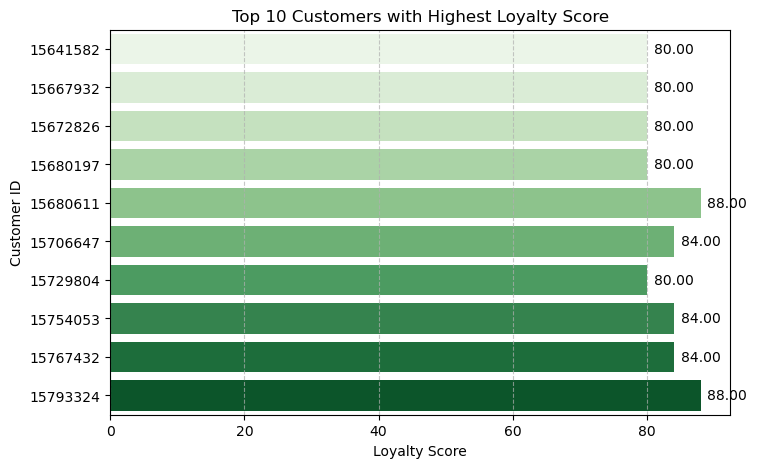

CustomerId  Loyalty Score Geography  Risk_Score  Loyalty Score  \
9018    15680611           88.0    France   73.198198           88.0   
8346    15793324           88.0     Spain   59.009009           88.0   
6763    15754053           84.0    France   73.198198           84.0   
569     15706647           84.0    France   58.603604           84.0   
727     15767432           84.0    France   56.171171           84.0   
67      15641582           80.0   Germany   61.711365           80.0   
6670    15667932           80.0     Spain   56.801802           80.0   
6260    15672826           80.0    France   56.827692           80.0   
6208    15729804           80.0    France   53.153153           80.0   
5728    15680197           80.0    France   55.990991           80.0   

      NumOfProducts  IsActiveMember       Age  CreditScore  
9018       0.666667             1.0  0.662162        0.626  
8346       0.666667             1.0  0.189189        0.690  
6763       0.666667             1.0  0.662162        0.736  
569        0.666667             1.0  0.175676        0.822  
727        0.666667             1.0  0.094595        0.722  
67         0.333333             1.0  0.337838        0.770  
6670       0.333333             1.0  0.337838        0.816  
6260       0.333333             1.0  0.189189        0.632  
6208       0.333333             1.0  0.216216        0.728  
5728       0.333333             1.0  0.310811        0.702

In [58]:
df_loyalty_score = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Loyalty Score'] >= 80) & (df_scaled['CreditScore'] >= 0.6)].sort_values(by='Loyalty Score', ascending=False).head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_loyalty_score, x='Loyalty Score', y='CustomerId', palette='Greens', orient='h')

# เพิ่มค่าลงในแต่ละบาร์
for p in ax.patches:
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            horizontalalignment='left', verticalalignment='center', fontsize=10)

plt.xlabel('Loyalty Score')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with Highest Loyalty Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

df_loyalty_score[['CustomerId', 'Loyalty Score','Geography','Risk_Score', 'Loyalty Score','NumOfProducts','IsActiveMember','Age','CreditScore']]

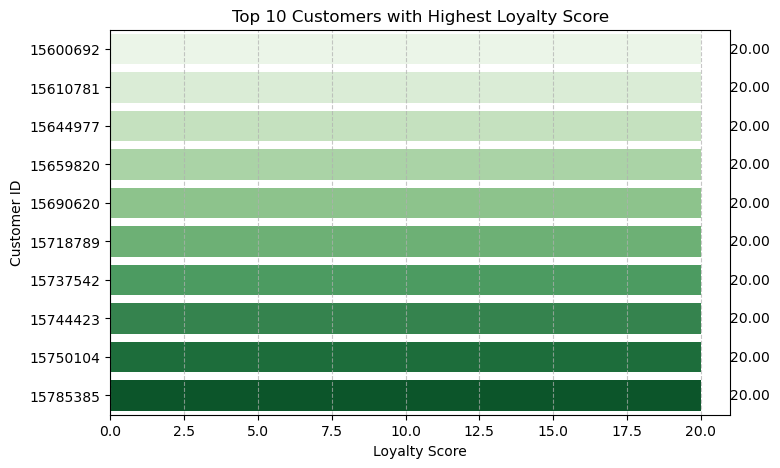

CustomerId  Loyalty Score Geography  Risk_Score  Loyalty Score  \
4376    15659820           20.0    France   13.153153           20.0   
9227    15644977           20.0    France   11.936937           20.0   
3961    15610781           20.0    France    7.981949           20.0   
3996    15718789           20.0    France   11.531532           20.0   
3997    15690620           20.0    France   10.359824           20.0   
4000    15600692           20.0    France   14.774775           20.0   
7535    15737542           20.0   Germany   11.414290           20.0   
4053    15785385           20.0     Spain   20.045045           20.0   
7485    15744423           20.0    France   12.342342           20.0   
7482    15750104           20.0   Germany   22.087443           20.0   

      NumOfProducts  IsActiveMember       Age  
4376       0.333333             0.0  0.216216  
9227       0.333333             0.0  0.175676  
3961       0.000000             0.0  0.148649  
3996       0.333333             0.0  0.162162  
3997       0.000000             0.0  0.283784  
4000       0.333333             0.0  0.270270  
7535       0.000000             0.0  0.243243  
4053       0.333333             0.0  0.445946  
7485       0.333333             0.0  0.189189  
7482       0.333333             0.0  0.337838

In [60]:
df_loyalty_score = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Loyalty Score'] <= 20)].sort_values(by='Loyalty Score', ascending=False).head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_loyalty_score, x='Loyalty Score', y='CustomerId', palette='Greens', orient='h')

# เพิ่มค่าลงในแต่ละบาร์
for p in ax.patches:
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
            horizontalalignment='left', verticalalignment='center', fontsize=10)

plt.xlabel('Loyalty Score')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers with Highest Loyalty Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

df_loyalty_score[['CustomerId', 'Loyalty Score','Geography','Risk_Score', 'Loyalty Score','NumOfProducts','IsActiveMember','Age']]

In [62]:
df_loyalty_score = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Loyalty Score'] <= 20)].sort_values(by='Loyalty Score', ascending=False)
df_loyalty_score

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
4376    15659820        0.528    France  Female  0.216216     0.5  0.000000   
9227    15644977        0.852    France  Female  0.175676     0.5  0.000000   
3961    15610781        0.704    France  Female  0.148649     1.0  0.352249   
3996    15718789        0.508    France    Male  0.162162     0.5  0.000000   
3997    15690620        0.630    France    Male  0.283784     1.0  0.184631   
...          ...          ...       ...     ...       ...     ...       ...   
710     15722548        0.380    France    Male  0.405405     0.0  0.590345   
5769    15611612        0.440    France  Female  0.148649     0.0  0.000000   
2211    15641850        0.734    France    Male  0.297297     0.0  0.391558   
5743    15571476        0.570     Spain    Male  0.270270     0.0  0.411550   
3805    15597394        0.636     Spain    Male  0.216216     0.0  0.000000   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
4376       0.333333        1.0             0.0         0.927840     0.0   
9227       0.333333        1.0             0.0         0.463226     0.0   
3961       0.000000        1.0             0.0         0.442736     0.0   
3996       0.333333        1.0             0.0         0.378911     0.0   
3997       0.000000        1.0             0.0         0.684068     0.0   
...             ...        ...             ...              ...     ...   
710        0.000000        0.0             0.0         0.584865     0.0   
5769       0.000000        1.0             0.0         0.185422     0.0   
2211       0.000000        1.0             0.0         0.554431     0.0   
5743       0.000000        0.0             0.0         0.791741     0.0   
3805       0.000000        0.0             0.0         0.499914     0.0   

      Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  \
4376       0.0                1.00    SILVER      0.317821   13.153153   
9227       0.0                0.25   DIAMOND      0.542565   11.936937   
3961       0.0                0.50  PLATINUM      0.541430    7.981949   
3996       0.0                0.00  PLATINUM      0.396141   11.531532   
3997       0.0                0.25      GOLD      0.397276   10.359824   
...        ...                 ...       ...           ...         ...   
710        0.0                0.50      GOLD      0.175936   18.065614   
5769       0.0                0.00    SILVER      0.309875    4.459459   
2211       0.0                0.50      GOLD      0.792281   12.834494   
5743       0.0                0.25  PLATINUM      0.474461   12.223609   
3805       0.0                0.00      GOLD      0.846765    6.486486   

      Loyalty Score  
4376           20.0  
9227           20.0  
3961           20.0  
3996           20.0  
3997           20.0  
...             ...  
710             0.0  
5769            0.0  
2211            0.0  
5743            0.0  
3805            0.0  

[2637 rows x 18 columns]

# Complain Risk Score ไม่ใช้แล้ว

In [65]:
# complain_score = ((df_scaled['Satisfaction Score']*0.25) 
#                   + (df_scaled['IsActiveMember']*0.15) 
#                   + (df_scaled['Complain']*0.6))*100

# df_scaled['Complain Score'] = complain_score
# df_scaled.head()

In [67]:
# plainEx0 = df_scaled[(df_scaled['Exited'] == 0) & (df_scaled['Complain Score'] >= 70)].sort_values(by='Complain Score', ascending=False)
# plainEx0['Complain Score'].mean()

In [69]:
# plainEx1 = df_scaled[(df_scaled['Complain Score'] >= 90)].sort_values(by='Complain Score', ascending=False)
# plainEx1

In [71]:
# plainEx1 = df_scaled[(df_scaled['Complain Score'] >= 90)].sort_values(by='Complain Score', ascending=False).head(10)

# plt.figure(figsize=(8, 5))
# ax = sns.barplot(data=plainEx1, x='Complain Score', y='CustomerId', palette='Set1', orient='h')

# # เพิ่มค่าลงในแต่ละบาร์
# for p in ax.patches:
#     ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, f'{p.get_width():.2f}', 
#             horizontalalignment='left', verticalalignment='center', fontsize=10)

# plt.xlabel('Complain Score')
# plt.ylabel('Customer ID')
# plt.title('Top 10 Customers with Highest Complain Score')
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.show()

# df_loyalty_score[['CustomerId', 'Complain Score','Geography','Risk_Score', 'Loyalty Score','NumOfProducts','IsActiveMember','Age']]

In [73]:
df_scaled.describe()

CustomerId   CreditScore           Age        Tenure       Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.569094e+07      0.601058      0.282727      0.501280      0.304848   
std    7.193619e+04      0.193307      0.141727      0.289217      0.248696   
min    1.556570e+07      0.000000      0.000000      0.000000      0.000000   
25%    1.562853e+07      0.468000      0.189189      0.300000      0.000000   
50%    1.569074e+07      0.604000      0.256757      0.500000      0.387402   
75%    1.575323e+07      0.736000      0.351351      0.700000      0.508749   
max    1.581569e+07      1.000000      1.000000      1.000000      1.000000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        0.176733      0.70550        0.515100         0.500441   
std         0.193885      0.45584        0.499797         0.287580   
min         0.000000      0.00000        0.000000         0.000000   
25%         0.000000      0.00000        0.000000         0.254977   
50%         0.000000      1.00000        1.000000         0.500960   
75%         0.333333      1.00000        1.000000         0.746955   
max         1.000000      1.00000        1.000000         1.000000   

             Exited      Complain  Satisfaction Score  Point Earned  \
count  10000.000000  10000.000000         10000.00000  10000.000000   
mean       0.203800      0.204400             0.50345      0.553366   
std        0.402842      0.403283             0.35148      0.256441   
min        0.000000      0.000000             0.00000      0.000000   
25%        0.000000      0.000000             0.25000      0.330306   
50%        0.000000      0.000000             0.50000      0.551646   
75%        0.000000      0.000000             0.75000      0.774120   
max        1.000000      1.000000             1.00000      1.000000   

         Risk_Score  Loyalty Score  
count  10000.000000   10000.000000  
mean      35.668962      41.082600  
std       21.159226      26.216077  
min        0.405405       0.000000  
25%       14.316973      16.000000  
50%       46.081081      52.000000  
75%       54.757189      66.000000  
max       82.676936     100.000000

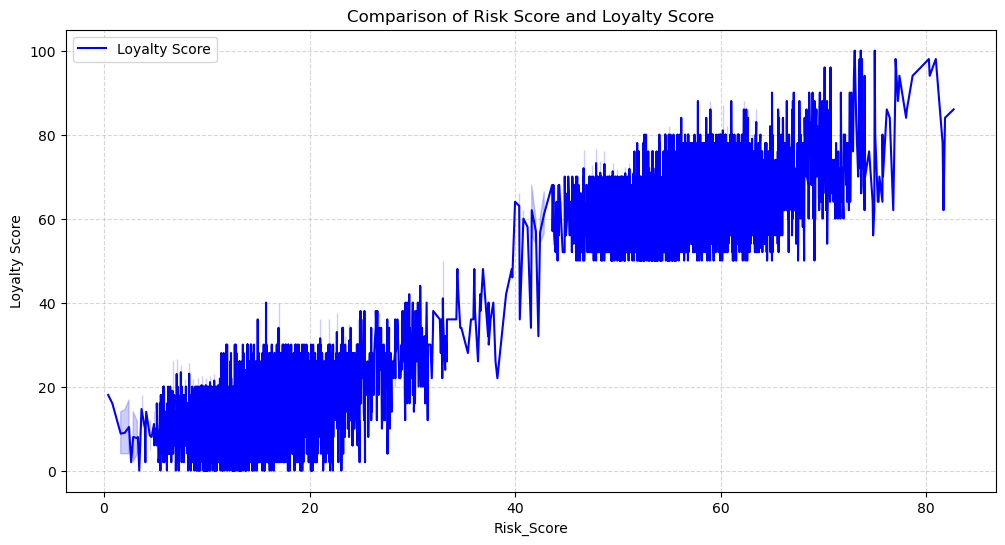

In [75]:
plt.figure(figsize=(12, 6))

# Plot Risk Score
# sns.lineplot(data=df_scaled, x=df_scaled.index, y=df_scaled['Risk_Score'], label="Risk Score", color="red")

# Plot Loyalty Score
sns.lineplot(data=df_scaled, x=df_scaled['Risk_Score'], y=df_scaled['Loyalty Score'], label="Loyalty Score", color='blue')

# plt.plot(x=df_scaled.index, y=df_scaled['Risk_Score'])
# plt.plot(x=df_scaled['Loyalty Score'],y=df_scaled['Risk_Score'])

# กำหนดชื่อแกนและ Title
plt.xlabel("Risk_Score")
plt.ylabel("Loyalty Score")
plt.title("Comparison of Risk Score and Loyalty Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

In [76]:
corr_foun = df_scaled.sort_values(by='Loyalty Score', ascending=False)
corr_foun

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
4606    15784958        0.894    France  Female  0.500000     1.0  0.000000   
9215    15624180        0.468   Germany  Female  0.256757     1.0  0.534766   
8590    15633194        0.842    France  Female  0.310811     1.0  0.431685   
2462    15704442        0.644    France  Female  0.472973     0.9  0.675200   
1701    15605279        0.884    France    Male  0.432432     0.9  0.000000   
...          ...          ...       ...     ...       ...     ...       ...   
4912    15792228        0.796    France    Male  0.567568     0.0  0.607162   
5942    15695339        0.334   Germany    Male  0.472973     0.0  0.435128   
9523    15790322        0.620    France  Female  0.189189     0.0  0.457034   
313     15797960        0.912   Germany  Female  0.554054     0.0  0.539248   
5278    15799300        0.320   Germany    Male  0.175676     0.0  0.453127   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
4606            1.0        1.0             1.0         0.247060     1.0   
9215            1.0        1.0             1.0         0.354612     1.0   
8590            1.0        1.0             1.0         0.687560     1.0   
2462            1.0        1.0             1.0         0.736570     1.0   
1701            1.0        1.0             1.0         0.973539     1.0   
...             ...        ...             ...              ...     ...   
4912            0.0        1.0             0.0         0.633719     1.0   
5942            0.0        1.0             0.0         0.273349     1.0   
9523            0.0        1.0             0.0         0.423007     0.0   
313             0.0        1.0             0.0         0.914142     0.0   
5278            0.0        1.0             0.0         0.165455     1.0   

      Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  \
4606       1.0                0.00      GOLD      0.146425   75.000000   
9215       1.0                0.25   DIAMOND      0.313280   73.050364   
8590       1.0                0.25    SILVER      0.726447   73.641177   
2462       1.0                0.75   DIAMOND      0.128263   80.941187   
1701       1.0                0.75   DIAMOND      0.283768   72.972973   
...        ...                 ...       ...           ...         ...   
4912       1.0                1.00    SILVER      0.396141   23.098644   
5942       1.0                0.75      GOLD      0.485812   18.540473   
9523       0.0                0.75  PLATINUM      0.384790   10.246013   
313        0.0                0.00    SILVER      0.416572   22.014103   
5278       1.0                0.25    SILVER      0.759364    9.801538   

      Loyalty Score  
4606          100.0  
9215          100.0  
8590          100.0  
2462           98.0  
1701           98.0  
...             ...  
4912            0.0  
5942            0.0  
9523            0.0  
313             0.0  
5278            0.0  

[10000 rows x 18 columns]

<Axes: >

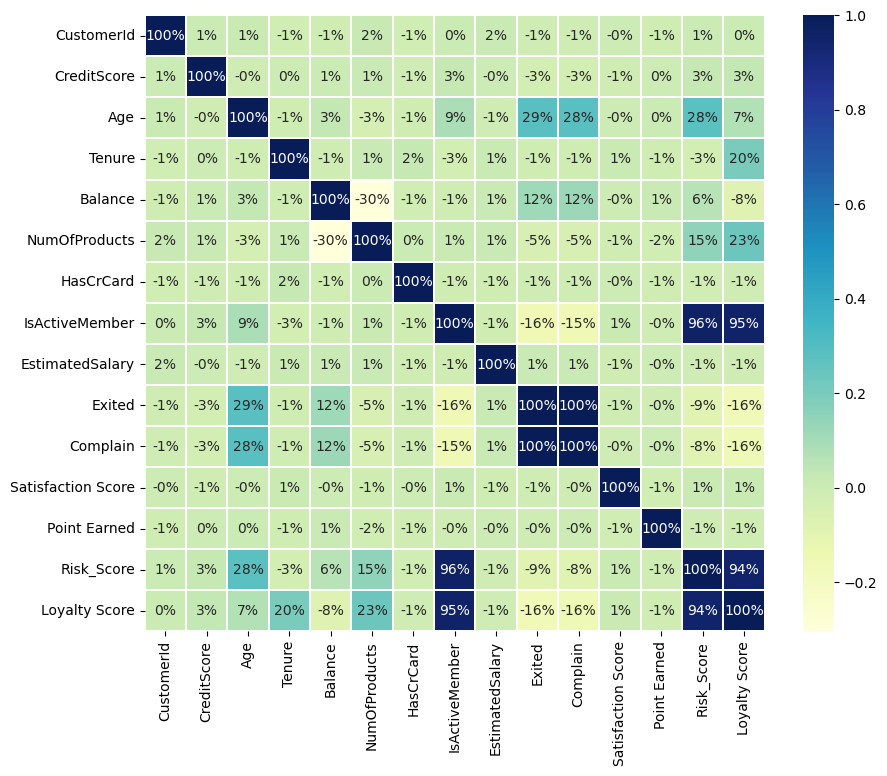

In [80]:
plt.figure(figsize=[10,8])
sns.heatmap(data=corr_foun.corr(numeric_only=True),annot=True,lw=.2,fmt='.0%',cmap='YlGnBu')

1. ความสัมพันธ์ของ Risk_Score
IsActiveMember (96%) → มี ความสัมพันธ์เชิงบวกสูงมาก หมายความว่า ลูกค้าที่ Active จะมี Risk Scoreสูง (มีโอกาส churn สูง) ส่วนลูกค้าที่ไม่ Active มี Risk Score ต่ำ (มีโอกาส churn ต่ำ)
NumOfProducts (15%) → ลูกค้าที่มีจำนวนผลิตภัณฑ์เยอะจะมี Risk Score สูงขึ้นเล็กน้อย
Age (28%) → ลูกค้าที่มีอายุมากขึ้น มีแนวโน้มที่จะมี Risk Score สูงขึ้น (อาจเพราะมีแนวโน้มเปลี่ยนธนาคารมากกว่า)
Exited (-9%) → มีความสัมพันธ์เชิงลบเล็กน้อย หมายความว่า ลูกค้าที่ออกจากธนาคาร อาจไม่ได้มี Risk Score สูงเสมอไป
Complain (-16%) → ลูกค้าที่มีการร้องเรียนมีแนวโน้มจะมี Risk Score ลดลง ซึ่งอาจหมายถึงว่าธนาคารอาจจัดการปัญหาได้ดี

2. ความสัมพันธ์ของ Loyalty_Score
IsActiveMember (95%) → ความสัมพันธ์ เชิงบวกสูงมาก หมายความว่า ลูกค้าที่ Active มี Loyalty Score สูง (แปลว่ามีความภักดีต่อธนาคารสูง)
NumOfProducts (23%) → ลูกค้าที่ใช้ผลิตภัณฑ์หลายอย่าง มีแนวโน้มจะภักดีมากขึ้น
Age (7%) → ลูกค้าที่มีอายุมากขึ้น มี Loyalty Score สูงขึ้นเล็กน้อย (อาจเป็นเพราะลูกค้ากลุ่มนี้อยู่กับธนาคารนาน)
Exited (-16%) → มีความสัมพันธ์เชิงลบปานกลาง หมายถึง ลูกค้าที่ออกจากธนาคารมักมี Loyalty Score ต่ำ
Complain (-16%) → ลูกค้าที่มีการร้องเรียนมากขึ้น มี Loyalty Score ลดลง

3. ความสัมพันธ์ระหว่าง Risk_Score และ Loyalty_Score
Risk_Score vs Loyalty_Score (94%)
→ มีความสัมพันธ์เชิงบวกสูงบวก หมายความว่า ลูกค้าที่มี Loyalty สูง จะมี Risk สูง และในทางกลับกัน ลูกค้าที่มี Risk ต่ำ จะมี Loyalty ต่ำ ซึ่งคือ ยิ่ง Loyalty สูง *ลูกค้าจะมีความคาดหวังที่จะได้รับบริการที่ดี มีโปรโมรชั่นดีๆ แต่หากมีอะไรไม่ถูกใจนิดเดียวมีสิทธิ์สูงมากที่จะ churn ทันที*

✅ แนวทางการนำไปใช้ในธุรกิจ
-มุ่งเน้นรักษาลูกค้า Active เพราะเป็นตัวแปรที่มีอิทธิพลมากที่สุดต่อความภักดีและความเสี่ยง
-ส่งเสริมการใช้ผลิตภัณฑ์หลายประเภท เพราะช่วยลดความเสี่ยงที่ลูกค้าจะ churn
-ให้ความสำคัญกับลูกค้าที่มีอายุเยอะ โดยเฉพาะถ้าพวกเขามี Risk Score สูง
-การจัดการข้อร้องเรียนที่สำคัญ เพื่อไม่ให้ส่งผลกระทบต่อ Loyalty Score และลด churn rate

#### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [148]:
df['CreditScore'][df['Balance'] >= 200000].describe()

count     34.000000
mean     642.264706
std      102.673448
min      463.000000
25%      575.500000
50%      652.500000
75%      703.500000
max      850.000000
Name: CreditScore, dtype: float64

In [150]:
df['CreditScore'][df['Balance'] == 0].describe()

count    3617.000000
mean      649.452861
std        96.158798
min       350.000000
25%       583.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64

In [177]:
df_scaled

CustomerId  CreditScore Geography  Gender       Age  Tenure   Balance  \
0       15634602        0.538    France  Female  0.324324     0.2  0.000000   
1       15647311        0.516     Spain  Female  0.310811     0.1  0.334031   
2       15619304        0.304    France  Female  0.324324     0.8  0.636357   
3       15701354        0.698    France  Female  0.283784     0.1  0.000000   
4       15737888        1.000     Spain  Female  0.337838     0.2  0.500246   
...          ...          ...       ...     ...       ...     ...       ...   
9995    15606229        0.842    France    Male  0.283784     0.5  0.000000   
9996    15569892        0.332    France    Male  0.229730     1.0  0.228657   
9997    15584532        0.718    France  Female  0.243243     0.7  0.000000   
9998    15682355        0.844   Germany    Male  0.324324     0.3  0.299226   
9999    15628319        0.884    France  Female  0.135135     0.4  0.518708   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0          0.000000        1.0             1.0         0.506735     1.0   
1          0.000000        0.0             1.0         0.562709     0.0   
2          0.666667        1.0             0.0         0.569654     1.0   
3          0.333333        0.0             0.0         0.469120     0.0   
4          0.000000        1.0             1.0         0.395400     0.0   
...             ...        ...             ...              ...     ...   
9995       0.333333        1.0             0.0         0.481341     0.0   
9996       0.000000        1.0             1.0         0.508490     0.0   
9997       0.000000        0.0             1.0         0.210390     1.0   
9998       0.333333        1.0             0.0         0.464429     1.0   
9999       0.000000        1.0             0.0         0.190914     0.0   

      Complain  Satisfaction Score Card Type  Point Earned  Risk_Score  \
0          1.0                0.25   DIAMOND      0.391600   49.729730   
1          1.0                0.50   DIAMOND      0.382520   52.664639   
2          1.0                0.50   DIAMOND      0.292849   29.426635   
3          0.0                1.00      GOLD      0.262202   15.180180   
4          0.0                1.00      GOLD      0.347333   55.137597   
...        ...                 ...       ...           ...         ...   
9995       0.0                0.00   DIAMOND      0.205448   15.180180   
9996       0.0                1.00  PLATINUM      0.740068   49.178462   
9997       1.0                0.50    SILVER      0.505108   47.297297   
9998       1.0                0.25      GOLD      0.249716   19.388660   
9999       0.0                0.50   DIAMOND      0.898978    9.241132   

      Loyalty Score  
0              54.0  
1              52.0  
2              36.0  
3              12.0  
4              54.0  
...             ...  
9995           20.0  
9996           70.0  
9997           64.0  
9998           16.0  
9999            8.0  

[10000 rows x 18 columns]

In [179]:
df_scaled.to_csv("Feature En.csv", index=False)